In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
from sklearn import svm

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

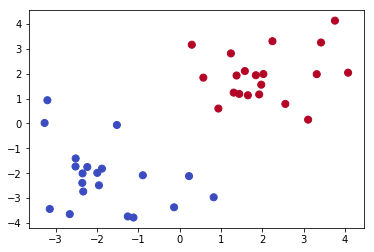

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

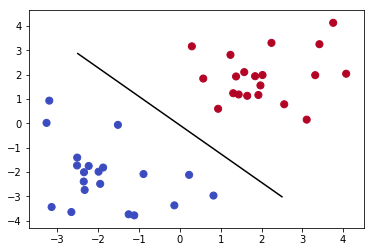

The seperating line is x2 = -1.176893 * x1 - 0.076650


In [3]:
# your code here
clf = svm.SVC(kernel='linear',C=10**100)  
clf.fit(X, Y) #training the model
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]
# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()
print("The seperating line is x2 = %f * x1 - %f" %(a, clf.intercept_[0]/w[1]))

#### b. List the support vectors.

In [4]:
# your code here
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

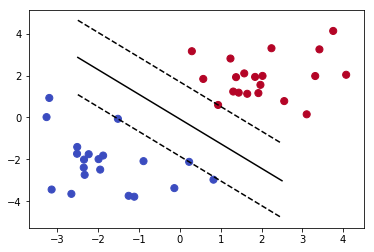

The upper line of margin is x2_up = -1.176893 * x1 + 1.698091
The lower line of margin is x2_down = -1.176893 * x1 + -1.851808


In [5]:
# your code here
b1 = clf.support_vectors_[0]
x2_down = a * x1 + (b1[1] - a * b1[0])

b2 = clf.support_vectors_[-1]
x2_up = a * x1 + (b2[1] - a * b2[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()
print("The upper line of margin is x2_up = %f * x1 + %f" %(a, b2[1] - a * b2[0]))
print("The lower line of margin is x2_down = %f * x1 + %f" %(a, b1[1] - a * b1[0]))

#### d. Compute the width of the margin.

In [6]:
# your code here
d = 2/(w[0]**2+w[1]**2)**0.5
print("The width of the margin is",d)

The width of the margin is 2.29779935043


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

If your C is too large the optimization algorithm will try to reduce |w| as much as possible leading to a hyperplane which tries to classify each training example correctly. Doing this will lead to loss in generalization properties of the classifier. On the other hand if your C is too small then you give your objective function a certain freedom to increase |w| a lot, which will lead to large training error.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

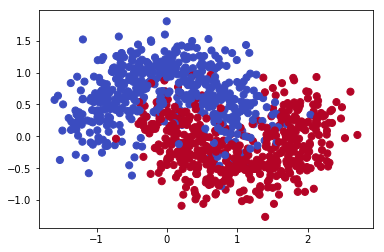

In [7]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [8]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [9]:
# your code here
clf = svm.SVC(kernel='poly') 
clf.fit(X, Y)
correct=(1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test))*100
print("In sample, we successfully predict {} percent of the data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y)))
print("Out sample, we successfully predict {} percent of the data".format(correct))

In sample, we successfully predict 92.85 percent of the data
Out sample, we successfully predict 87.57575757575758 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


            0         1
0    0.000045  0.770270
1    0.000048  0.770270
2    0.000051  0.770270
3    0.000054  0.770270
4    0.000057  0.770270
5    0.000060  0.770270
6    0.000063  0.770270
7    0.000067  0.770270
8    0.000071  0.770270
9    0.000075  0.770270
10   0.000079  0.770270
11   0.000083  0.770270
12   0.000088  0.770270
13   0.000093  0.770270
14   0.000098  0.770270
15   0.000104  0.770270
16   0.000110  0.770270
17   0.000116  0.770270
18   0.000123  0.770270
19   0.000130  0.770270
20   0.000137  0.770270
21   0.000145  0.770270
22   0.000153  0.770270
23   0.000162  0.770270
24   0.000171  0.770270
25   0.000181  0.770270
26   0.000191  0.770270
27   0.000202  0.770270
28   0.000213  0.770270
29   0.000226  0.770270
..        ...       ...
170  0.547159  0.819820
171  0.578256  0.819820
172  0.611120  0.828829
173  0.645851  0.824324
174  0.682557  0.819820
175  0.721348  0.819820
176  0.762344  0.819820
177  0.805671  0.819820
178  0.851459  0.828829
179  0.899850  0

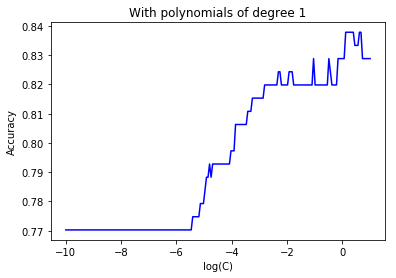

            0         1
0    0.000045  0.711712
1    0.000048  0.711712
2    0.000051  0.711712
3    0.000054  0.711712
4    0.000058  0.711712
5    0.000061  0.711712
6    0.000065  0.711712
7    0.000069  0.711712
8    0.000074  0.711712
9    0.000078  0.711712
10   0.000083  0.711712
11   0.000088  0.711712
12   0.000094  0.711712
13   0.000099  0.711712
14   0.000106  0.711712
15   0.000112  0.711712
16   0.000119  0.711712
17   0.000127  0.711712
18   0.000134  0.711712
19   0.000143  0.711712
20   0.000152  0.711712
21   0.000161  0.711712
22   0.000171  0.711712
23   0.000182  0.711712
24   0.000193  0.711712
25   0.000205  0.711712
26   0.000218  0.711712
27   0.000231  0.711712
28   0.000246  0.711712
29   0.000261  0.711712
..        ...       ...
170  1.285640  0.738739
171  1.365551  0.738739
172  1.450429  0.738739
173  1.540583  0.738739
174  1.636340  0.738739
175  1.738050  0.743243
176  1.846082  0.738739
177  1.960828  0.738739
178  2.082707  0.738739
179  2.212161  0

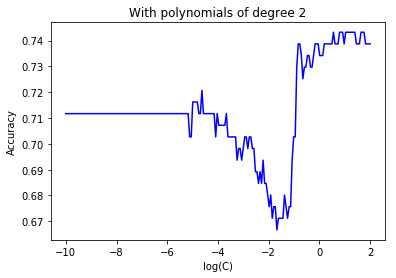

             0         1
0     0.000045  0.666667
1     0.000048  0.666667
2     0.000052  0.666667
3     0.000055  0.666667
4     0.000059  0.666667
5     0.000063  0.666667
6     0.000067  0.666667
7     0.000072  0.666667
8     0.000077  0.666667
9     0.000082  0.666667
10    0.000087  0.666667
11    0.000093  0.666667
12    0.000099  0.666667
13    0.000106  0.666667
14    0.000113  0.666667
15    0.000121  0.666667
16    0.000129  0.666667
17    0.000138  0.666667
18    0.000147  0.666667
19    0.000157  0.666667
20    0.000168  0.666667
21    0.000179  0.666667
22    0.000191  0.666667
23    0.000204  0.666667
24    0.000218  0.666667
25    0.000232  0.666667
26    0.000248  0.666667
27    0.000265  0.666667
28    0.000283  0.666667
29    0.000302  0.666667
..         ...       ...
170   3.020818  0.833333
171   3.224746  0.833333
172   3.442441  0.833333
173   3.674832  0.833333
174   3.922912  0.828829
175   4.187738  0.833333
176   4.470443  0.828829
177   4.772232  0.833333


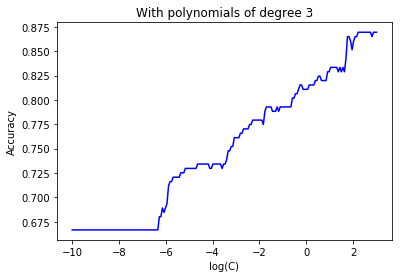

             0         1
0     0.000045  0.581081
1     0.000049  0.581081
2     0.000052  0.581081
3     0.000056  0.581081
4     0.000060  0.581081
5     0.000065  0.581081
6     0.000069  0.581081
7     0.000074  0.581081
8     0.000080  0.581081
9     0.000086  0.581081
10    0.000092  0.581081
11    0.000098  0.581081
12    0.000106  0.581081
13    0.000113  0.581081
14    0.000122  0.581081
15    0.000130  0.581081
16    0.000140  0.581081
17    0.000150  0.581081
18    0.000161  0.581081
19    0.000173  0.581081
20    0.000185  0.581081
21    0.000199  0.581081
22    0.000213  0.581081
23    0.000229  0.581081
24    0.000246  0.581081
25    0.000264  0.581081
26    0.000283  0.581081
27    0.000303  0.581081
28    0.000325  0.581081
29    0.000349  0.581081
..         ...       ...
170   7.097900  0.648649
171   7.615234  0.702703
172   8.170275  0.707207
173   8.765769  0.716216
174   9.404667  0.711712
175  10.090131  0.711712
176  10.825555  0.702703
177  11.614581  0.702703


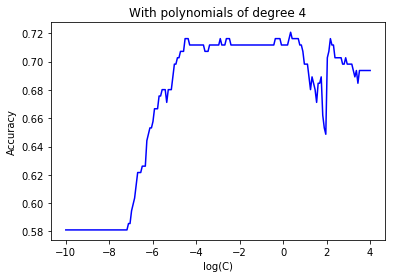

In [10]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
for d in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,d,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=d) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T # put results together.
    print(temp)
    print("Maximum OS score corresponding to C")
    print(temp[temp[1]==max(temp[1])])

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title("With polynomials of degree %i" %d)
    plt.show()
    
#     print(temp.iloc[temp[1].idxmax()])

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [11]:
# your code here
# Since the accuracy reaches its maximum at degree 3, so I choose optimal C within degree = 3, 
# and accuracy equals to 0.869369.
# There are multiple C I can choose, from range 9 to 20, I choose 20 in this case.
clf = svm.SVC(kernel='poly',C=20,degree=3)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

Out of sample, we successfully predict 88.7878787878788 percent of the data using a linear kernel


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) = 6/11 

P(No) = 5/11 

P(Red|Yes) = 5/6 

P(SUV|Yes) = 2/6  = 1/3 

P(Domestic|Yes) = 3/6 = 1/2

P(Red|No) = 2/5 

P(SUV|No) = 3/5 

P(Domestic|No) = 3/5 

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(Yes|Red,Domestic,SUV)=(P(Yes)P(Red|Yes)P(SUV|Yes)P(Domestic|Yes))/(P(Yes)P(Red|Yes)P(SUV|Yes)P(Domestic|Yes)+P(No)P(Red|No)P(SUV|No)P(Domestic|No))=125/233 

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [12]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [13]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [14]:
# your code here
print(gnb.class_prior_[1])

0.300847457627


### c) What is the mean and variance of each input variable for patients with diabetes?

In [16]:
# your code here
datatrain = data_train[['y','t_pre','glu','blood_p','triceps','serum','b_m','pedigree_f','age']]
datatrain.head()

,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,0.0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,0.0,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,0.0,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,1.0,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


In [17]:
df_d = datatrain.loc[datatrain['y']==1]
df_d.drop(['y'], axis=1, inplace=True)
df_d.columns

Index(['t_pre', 'glu', 'blood_p', 'triceps', 'serum', 'b_m', 'pedigree_f',
       'age'],
      dtype='object')

In [18]:
print("Mean of each input variable for patients with diabetes")
print(df_d.mean())
print()
print("Variance of each input variable for patients with diabetes")
print(df_d.var())

Mean of each input variable for patients with diabetes
t_pre           4.070423
glu           144.140845
blood_p        74.563380
triceps        33.478873
serum         209.211268
b_m            35.223944
pedigree_f      0.639042
age            35.788732
dtype: float64

Variance of each input variable for patients with diabetes
t_pre            12.380684
glu             937.979879
blood_p         190.420926
triceps          95.310262
serum         16108.940443
b_m              39.168704
pedigree_f        0.192758
age             105.340443
dtype: float64


### d) What is the mean and variance of each input variable for patients without diabetes?

In [19]:
# your code here
df_wd = datatrain.loc[datatrain['y']==0]
df_wd.drop(['y'], axis=1, inplace=True)
df_wd.columns

Index(['t_pre', 'glu', 'blood_p', 'triceps', 'serum', 'b_m', 'pedigree_f',
       'age'],
      dtype='object')

In [20]:
print("Mean of each input variable for patients without diabetes")
print(df_wd.mean())
print()
print("Variance of each input variable for patients without diabetes")
print(df_wd.var())

Mean of each input variable for patients without diabetes
t_pre           2.690909
glu           111.466667
blood_p        69.206061
triceps        27.200000
serum         127.006061
b_m            31.709091
pedigree_f      0.468685
age            28.393939
dtype: float64

Variance of each input variable for patients without diabetes
t_pre            6.812417
glu            609.689431
blood_p        137.201183
triceps        108.929268
serum         8369.713378
b_m             40.165344
pedigree_f       0.085118
age             72.886548
dtype: float64


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [21]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [22]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [23]:
# your code here
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print (i)
    print (j)
    print()
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print ('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

0_1
1    0.50
5    0.25
2    0.25
Name: 0, dtype: float64

1_0
6    0.6
4    0.2
1    0.2
Name: 1, dtype: float64

prior
0.444444444444

0_0
6    0.4
4    0.2
3    0.2
2    0.2
Name: 0, dtype: float64

1_1
2    0.50
3    0.25
1    0.25
Name: 1, dtype: float64

2_1
2    0.50
6    0.25
1    0.25
Name: 2, dtype: float64

2_0
6    0.6
4    0.2
2    0.2
Name: 2, dtype: float64

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.6944444444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [24]:
# your code here
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print ('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True)
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [25]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print (i)
    print (j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
0_1
{1: 0.40028192967985365, 2: 0.1904485153439564, 3: 0.23